## K-means e o aprendizado não supervisionado

 

#### Motivação


- Criação da base de dados sintética

- Treinamento do K-means

- Visualização dos resultados

- Previsão em novos dados

- Avaliação do nùmero de clusters necessàrios

 

________________________________________________________


In [1]:
# Carregando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

_____________________________

### Criaçao da base de dados sintética

In [2]:
base = 2*np.random.rand(300,2) #Multiplica por 2 somente para ter um número maior
base[100:200, :] = base[100:200, :] + 2 + np.random.rand(100,1) 
base[200:300, :] = base[100:200, :] + 2.5 + np.random.rand(100,1) 

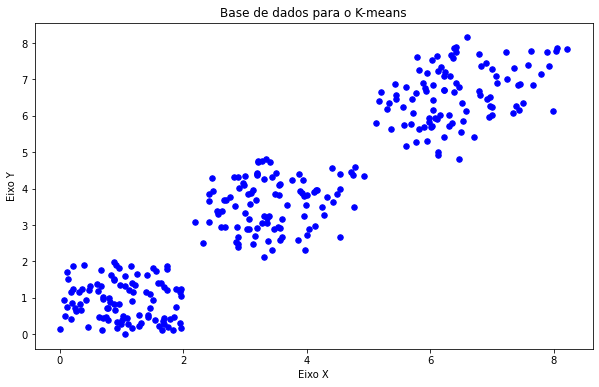

In [3]:
# Visualizaçao da base

plt.figure(figsize = (10, 6))
plt.scatter(base[ : , 0], base[ :, 1], s = 30, color = "blue")
plt.title('Base de dados para o K-means')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y');

_____________________________

### Treinamento do K-means

In [4]:
kmodel = KMeans(n_clusters = 3, random_state = 42)
clusters = kmodel.fit(base)

In [10]:
kmodel

KMeans(n_clusters=3, random_state=42)

In [18]:
# Verificaçao dos centroides

clusters.cluster_centers_

array([[3.57643144, 3.42644555],
       [6.57857301, 6.42858712],
       [1.02592749, 1.09570578]])

In [30]:
clusters.inertia_

221.07977915802076

In [ ]:
#array([[3.57643144, 3.42644555],
#       [6.57857301, 6.42858712],
#       [1.02592749, 1.09570578]])

In [8]:
clusters.cluster_centers_[0][0]

3.576431443886428

In [10]:
clusters.cluster_centers_[1][0]

6.57857300909296

In [11]:
# Acessando os clusters

clusters.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

_____________________________

### Visualizaçao dos resultados

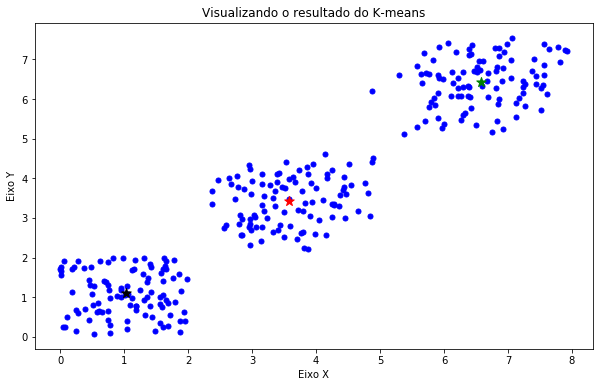

In [14]:
plt.figure(figsize = (10, 6))
plt.scatter(base[ : , 0], base[ :, 1], s = 25, color = 'blue')
plt.scatter(clusters.cluster_centers_[0][0], clusters.cluster_centers_[0][1], marker='*', s = 100, color = 'red')
plt.scatter(clusters.cluster_centers_[1][0], clusters.cluster_centers_[1][1], marker='*', s = 100, color = 'green')
plt.scatter(clusters.cluster_centers_[2][0], clusters.cluster_centers_[2][1], marker='*', s = 100, color = 'black')
plt.title('Visualizando o resultado do K-means')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y');

_____________________________

### Previsao em novos dados

In [21]:
var1 = 7
var2 = 6

new_data = np.array([var1,var2])
new_data = new_data.reshape(1, -1)
kmodel.predict(new_data)

array([1])

_____________________________

### Avaliaçao dos numeros de clusters necessàrios

In [22]:
min_clusters = 2
max_clusters = 20
inertias = np.zeros(shape = (max_clusters - min_clusters + 1,))

In [26]:
for i in range(min_clusters, max_clusters + 1):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(base)
    inertias[i - min_clusters] = km.inertia_

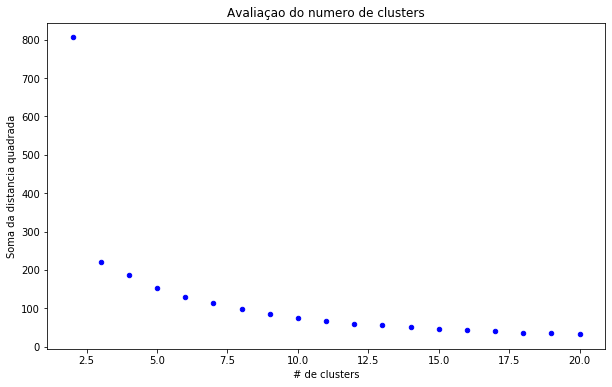

In [28]:
plt.figure(figsize = (10, 6))
plt.scatter(range(min_clusters, max_clusters + 1), inertias, s = 20, color = "b")
plt.title('Avaliaçao do numero de clusters')
plt.xlabel('# de clusters')
plt.ylabel('Soma da distancia quadrada');